In [1]:
import pandas as pd
import numpy as np
from itertools import combinations 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import re

# Auxiliary Functions preprocessing.

In [2]:
def filter_data(raw_data, intensity_kind):
    df = raw_data.copy()
    colomns_to_filter = df.columns[6:]
    for col_name in colomns_to_filter:
        if intensity_kind not in col_name:
            df = df.drop(col_name, 1)
    return df 

def split_by_methods(df,intensity_kind):
    epulse_df = df.copy()
    lysis_df = df.copy()
    for col_name in df.columns:
        res = re.search(intensity_kind, col_name)
        if res != None:
            res = re.search(f'C', col_name)
            if res == None:  
                lysis_df = lysis_df.drop(col_name, 1)
            else:
                epulse_df = epulse_df.drop(col_name, 1)
    return epulse_df, lysis_df

def binarize_intensity(df, start=6):
    df.iloc[:,start:] = df.iloc[:,start:].clip_upper(1)
    return df

# Read Merged Lysis Dataset.

In [3]:
df_lysis = pd.read_csv('proteinGroups-lysis-new-old-outer-join.csv').fillna(0)

In [4]:
df_lysis

,Unnamed: 0,Gene names,BCC LFQ intensity 12_1L,BCC LFQ intensity 12_3L,BCC LFQ intensity 12_5L,BCC LFQ intensity 27_1L,BCC LFQ intensity 27_3L,BCC LFQ intensity 27_5L,BCC LFQ intensity 39_1L,BCC LFQ intensity 39_3L,...,SCC LFQ intensity 45_3L,SCC LFQ intensity 60_3L,SCC LFQ intensity 95_3L,SCC LFQ intensity 101_3L,SCC&BCC LFQ intensity 25_1L,SCC&BCC LFQ intensity 25_3L,SCC&BCC LFQ intensity 25_5L,keratosis LFQ intensity 33_1L,keratosis LFQ intensity 33_3L,keratosis LFQ intensity 33_5L
0,0,AHNAK,7.071800e+10,1.635100e+11,1.055400e+11,1.237600e+11,1.150800e+11,2.077000e+11,9.920800e+10,1.056200e+11,...,2.147900e+10,3.091400e+10,2.046600e+10,1.299700e+09,1.080900e+11,1.128200e+11,1.499600e+11,6.939200e+10,7.246200e+10,9.374300e+10
1,1,PLEC,2.502900e+10,1.056100e+10,3.687400e+10,9.903200e+10,9.885000e+10,5.764500e+10,3.045400e+10,4.728600e+10,...,3.478300e+10,1.084300e+10,1.581700e+10,5.400000e+09,4.124600e+10,6.575300e+10,5.090800e+10,3.042700e+10,3.461900e+10,3.734000e+10
2,2,DSP,5.872300e+10,2.402000e+10,7.494300e+10,6.910000e+10,9.698300e+10,9.792700e+10,6.878600e+10,1.300300e+10,...,3.079100e+10,1.297200e+10,1.273800e+10,4.658100e+10,9.428900e+10,1.571700e+11,2.017000e+11,1.063300e+11,8.053000e+10,1.235500e+11
3,3,DYNC1H1,1.310200e+10,4.497000e+09,7.804400e+09,1.017300e+10,1.408400e+10,1.288800e+10,5.579700e+09,5.080000e+09,...,1.695100e+09,3.285700e+09,2.064600e+09,8.593900e+08,1.156500e+10,9.379300e+09,1.258600e+10,1.101500e+10,8.103000e+09,6.867800e+09
4,4,MYH9,7.936100e+10,4.575400e+10,5.782800e+10,8.879200e+10,6.510300e+10,1.006200e+11,4.863200e+10,8.185300e+10,...,2.560500e+10,1.919000e+10,2.388200e+10,2.251400e+10,4.656900e+10,4.844200e+10,4.425900e+10,6.786000e+10,6.468800e+10,6.119800e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,5777,CA5B,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5778,5778,HIF3A,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5779,5779,PRKAB1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5780,5780,SPCS1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.208500e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [5]:
# df_lysis.iloc[:,25]
df_lysis = df_lysis[[c for c in df_lysis.columns if c not in ['Unnamed: 0']]]
# for i,col in enumerate(df_lysis.columns):
#     print(col)
df_lysis

,Gene names,BCC LFQ intensity 12_1L,BCC LFQ intensity 12_3L,BCC LFQ intensity 12_5L,BCC LFQ intensity 27_1L,BCC LFQ intensity 27_3L,BCC LFQ intensity 27_5L,BCC LFQ intensity 39_1L,BCC LFQ intensity 39_3L,BCC LFQ intensity 39_5L,...,SCC LFQ intensity 45_3L,SCC LFQ intensity 60_3L,SCC LFQ intensity 95_3L,SCC LFQ intensity 101_3L,SCC&BCC LFQ intensity 25_1L,SCC&BCC LFQ intensity 25_3L,SCC&BCC LFQ intensity 25_5L,keratosis LFQ intensity 33_1L,keratosis LFQ intensity 33_3L,keratosis LFQ intensity 33_5L
0,AHNAK,7.071800e+10,1.635100e+11,1.055400e+11,1.237600e+11,1.150800e+11,2.077000e+11,9.920800e+10,1.056200e+11,8.127700e+10,...,2.147900e+10,3.091400e+10,2.046600e+10,1.299700e+09,1.080900e+11,1.128200e+11,1.499600e+11,6.939200e+10,7.246200e+10,9.374300e+10
1,PLEC,2.502900e+10,1.056100e+10,3.687400e+10,9.903200e+10,9.885000e+10,5.764500e+10,3.045400e+10,4.728600e+10,6.173100e+10,...,3.478300e+10,1.084300e+10,1.581700e+10,5.400000e+09,4.124600e+10,6.575300e+10,5.090800e+10,3.042700e+10,3.461900e+10,3.734000e+10
2,DSP,5.872300e+10,2.402000e+10,7.494300e+10,6.910000e+10,9.698300e+10,9.792700e+10,6.878600e+10,1.300300e+10,8.980600e+10,...,3.079100e+10,1.297200e+10,1.273800e+10,4.658100e+10,9.428900e+10,1.571700e+11,2.017000e+11,1.063300e+11,8.053000e+10,1.235500e+11
3,DYNC1H1,1.310200e+10,4.497000e+09,7.804400e+09,1.017300e+10,1.408400e+10,1.288800e+10,5.579700e+09,5.080000e+09,6.844700e+09,...,1.695100e+09,3.285700e+09,2.064600e+09,8.593900e+08,1.156500e+10,9.379300e+09,1.258600e+10,1.101500e+10,8.103000e+09,6.867800e+09
4,MYH9,7.936100e+10,4.575400e+10,5.782800e+10,8.879200e+10,6.510300e+10,1.006200e+11,4.863200e+10,8.185300e+10,1.031400e+11,...,2.560500e+10,1.919000e+10,2.388200e+10,2.251400e+10,4.656900e+10,4.844200e+10,4.425900e+10,6.786000e+10,6.468800e+10,6.119800e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,CA5B,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5778,HIF3A,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5779,PRKAB1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5780,SPCS1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.208500e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


# Binarize Intensities

In [6]:
binary_df_lysis = binarize_intensity(df_lysis, start=1)
binary_df_lysis

/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Gene names,BCC LFQ intensity 12_1L,BCC LFQ intensity 12_3L,BCC LFQ intensity 12_5L,BCC LFQ intensity 27_1L,BCC LFQ intensity 27_3L,BCC LFQ intensity 27_5L,BCC LFQ intensity 39_1L,BCC LFQ intensity 39_3L,BCC LFQ intensity 39_5L,...,SCC LFQ intensity 45_3L,SCC LFQ intensity 60_3L,SCC LFQ intensity 95_3L,SCC LFQ intensity 101_3L,SCC&BCC LFQ intensity 25_1L,SCC&BCC LFQ intensity 25_3L,SCC&BCC LFQ intensity 25_5L,keratosis LFQ intensity 33_1L,keratosis LFQ intensity 33_3L,keratosis LFQ intensity 33_5L
0,AHNAK,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,PLEC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,DSP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,DYNC1H1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,MYH9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,CA5B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5778,HIF3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5779,PRKAB1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5780,SPCS1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Add BCC subtype as prefix to each column.

In [7]:
infiltrative_bcc3 = [i for i in binary_df_lysis.columns if i.startswith('BCC') and any(x in i for x in ['103', '99', '39'])]
superficial_bcc3 = [i for i in binary_df_lysis.columns if i.startswith('BCC') and any(x in i for x in ['54', '104', '12'])]
nodular_bcc3 = [i for i in binary_df_lysis.columns if i.startswith('BCC') and any(x in i for x in ['73', '92', '27'])]
bcc3 = []
bcc3.extend(infiltrative_bcc3)
bcc3.extend(superficial_bcc3)
bcc3.extend(nodular_bcc3)
df_bcc3 = binary_df_lysis[bcc3]
# display(df_BCC3)
df_bcc3.columns = ['{0}{1}'.format('Infiltrative ' if c in infiltrative_bcc3 else 'Superficial ' if c in superficial_bcc3 else 'Nodular ',c) for c in bcc3]
display(df_bcc3)


,Infiltrative BCC LFQ intensity 39_1L,Infiltrative BCC LFQ intensity 39_3L,Infiltrative BCC LFQ intensity 39_5L,Infiltrative BCC LFQ intensity 103_1L,Infiltrative BCC LFQ intensity 103_3L,Infiltrative BCC LFQ intensity 103_5L,Infiltrative BCC LFQ intensity 99_1L,Infiltrative BCC LFQ intensity 99_3L,Infiltrative BCC LFQ intensity 99_5L,Superficial BCC LFQ intensity 12_1L,...,Superficial BCC LFQ intensity 104_5L,Nodular BCC LFQ intensity 27_1L,Nodular BCC LFQ intensity 27_3L,Nodular BCC LFQ intensity 27_5L,Nodular BCC LFQ intensity 73_1L,Nodular BCC LFQ intensity 73_3L,Nodular BCC LFQ intensity 73_5L,Nodular BCC LFQ intensity 92_1L,Nodular BCC LFQ intensity 92_3L,Nodular BCC LFQ intensity 92_5L
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5779,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5780,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


# SHORTCUT PATIENTS NAMES

In [8]:

new_columns = []
for col in df_bcc3.columns:
    new_col = col.replace("Infiltrative", "I_")
    new_col = new_col.replace("Superficial", "S_")
    new_col = new_col.replace("Nodular", "N_")
    new_col = new_col.replace("1L", "I")
    new_col = new_col.replace("3L", "II")
    new_col = new_col.replace("5L", "III")
    new_col = new_col.replace("39", "1")
    new_col = new_col.replace("103", "2")
    new_col = new_col.replace("99", "3")
    new_col = new_col.replace("12", "4")
    new_col = new_col.replace("54", "5")
    new_col = new_col.replace("104", "6")
    new_col = new_col.replace("27", "7")
    new_col = new_col.replace("73", "8")
    new_col = new_col.replace("92", "9")
    new_col = new_col.replace(" BCC LFQ intensity ", "").strip()
    #new_col += ' '
    #new_col = new_col.replace(" ", "")
    new_columns.append(new_col)
df_bcc3.columns = new_columns    
display(df_bcc3)
df_bcc3['I_1_I']

,I_1_I,I_1_II,I_1_III,I_2_I,I_2_II,I_2_III,I_3_I,I_3_II,I_3_III,S_4_I,...,S_6_III,N_7_I,N_7_II,N_7_III,N_8_I,N_8_II,N_8_III,N_9_I,N_9_II,N_9_III
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5779,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5780,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5777    0.0
5778    0.0
5779    0.0
5780    0.0
5781    0.0
Name: I_1_I, Length: 5782, dtype: float64

In [9]:
infiltrative_bcc3

['BCC LFQ intensity 39_1L',
 'BCC LFQ intensity 39_3L',
 'BCC LFQ intensity 39_5L',
 'BCC LFQ intensity 103_1L',
 'BCC LFQ intensity 103_3L',
 'BCC LFQ intensity 103_5L',
 'BCC LFQ intensity 99_1L',
 'BCC LFQ intensity 99_3L',
 'BCC LFQ intensity 99_5L']

# Auxiliary Functions Drawing.

In [10]:
def draw_tree(tree):
    fig = plt.figure(figsize=(40,40), dpi=100)
    matplotlib.rc('font', size=37)
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, branch_labels=lambda c: c.branch_length)
    plt.rcParams['lines.linewidth'] = 7
    
def draw_cancers_coloring_tree(tree):
    infiltrative = [{"name": r"I_1_I"}, {"name": r"I_1_II"}, {"name": r"I_1_III"},
                    {"name": r"I_2_I"}, {"name": r"I_2_II"}, {"name": r"I_2_III"}, 
                    {"name": r"I_3_I"}, {"name": r"I_3_II"}, {"name": r"I_3_III"}]
    
    superficial =  [{"name": r"S_4_I"}, {"name": r"S_4_II"}, {"name": r"S_4_III"},
                    {"name": r"S_5_I"}, {"name": r"S_5_II"}, {"name": r"S_5_III"},
                    {"name": r"S_6_I"}, {"name": r"S_6_II"}, {"name": r"S_6_III"}]
    
    nodular =   [{"name": r"N_7_I"}, {"name": r"N_7_II"}, {"name": r"N_7_III"},
                 {"name": r"N_8_I"}, {"name": r"N_8_II"}, {"name": r"N_8_III"}, 
                 {"name": r"N_9_I"}, {"name": r"N_9_II"}, {"name": r"N_9_III"}]
    
    
   
    for patients, color in [(infiltrative,'#BA55D3'), (superficial,'#FF8C00'), (nodular,'blue')]:
        for patient in patients:
            try:
#             mrca = tree.is_monophyletic([patient['name']])
                mrca = tree.common_ancestor([patient])
                print(mrca)
                mrca.color = color
            except:
                print('a')
    draw_tree(tree)
    
    
from io import StringIO
from Bio import Phylo

# Auxiliary Functions Local Intersection Tree Building.

In [11]:
def get_node_data(n,df_bcc3):
    sample = df_bcc3[n]
    rest = df_bcc3.drop(n,1)
    vector = [1 if sample[i] == 1 else 0 for i in sample.index]
    return vector
    
def calc_intersection(branch1_vector,branch2_vector, root_vector):
    return sum([1 if branch1_vector[i]==branch2_vector[i]==1 else 0 for i in range(len(branch1_vector))]) - sum(root_vector)

def add_row_to_table(branch1_vector,branch2_vector,branch3_vector,table,root_vector):
    n1_sub_vector = [1 if branch1_vector[i]==branch2_vector[i]==1 or branch3_vector[i]==branch1_vector[i]==1 else 0 for i in range(len(root_vector))]
    n2_sub_vector = [1 if branch1_vector[i]==branch2_vector[i]==1 or branch3_vector[i]==branch2_vector[i]==1 else 0 for i in range(len(root_vector))]
    n3_sub_vector = [1 if branch3_vector[i]==branch2_vector[i]==1 or branch3_vector[i]==branch1_vector[i]==1 else 0 for i in range(len(root_vector))]
    
    table.append({'L I UG':sum(branch1_vector)-sum(n1_sub_vector),
                  'L II UG':sum(branch2_vector)-sum(n2_sub_vector),
                  'L III UG':sum(branch3_vector)-sum(n3_sub_vector),
                  'L I and L II CG':calc_intersection(branch1_vector, branch2_vector,root_vector),
                  'L I and L III CG':calc_intersection(branch1_vector, branch3_vector,root_vector),
                  'L II and L III CG':calc_intersection(branch2_vector, branch3_vector,root_vector)})
    return table

def get_nodes_hierarchy(n1,n2,n3,df,table, kind='regular'):
    tree = ''
    vector1 = get_node_data(n1, df_bcc3)
    vector2 = get_node_data(n2, df_bcc3)
    vector3 = get_node_data(n3, df_bcc3)

    samples = df_bcc3[[n1, n2, n3]]
    rest = df_bcc3.drop([n1, n2, n3],1)
    root_vector = [1 if vector1[i]==vector2[i]==vector3[i]==1 else 0 for i in samples.index]
    #remove
    if kind == 'regular':
        n1_sub_vector = root_vector
        n2_sub_vector = root_vector
        n3_sub_vector = root_vector
    if kind == 'complement':
        n1_sub_vector = [1 if vector1[i]==vector2[i]==1 or vector3[i]==vector1[i]==1 else 0 for i in samples.index]
        n2_sub_vector = [1 if vector1[i]==vector2[i]==1 or vector3[i]==vector2[i]==1 else 0 for i in samples.index]
        n3_sub_vector = [1 if vector3[i]==vector2[i]==1 or vector3[i]==vector1[i]==1 else 0 for i in samples.index]
#     display('rest',rest)
#     display('root_vector', root_vector)
    root_distance = int(sum(root_vector))
    hierarchy = '({}, {}, {}){}'.format(n1.replace('BCC ','').replace('intensity ', '').replace('LFQ ', '').replace(' ','_') + ':' + str(int(sum(vector1)-sum(n1_sub_vector))),
                                        n2.replace('BCC ','').replace('intensity ', '').replace('LFQ ', '').replace(' ','_') + ':' + str(int(sum(vector2)-sum(n2_sub_vector))),
                                        n3.replace('BCC ','').replace('intensity ', '').replace('LFQ ', '').replace(' ','_') + ':' + str(int(sum(vector3)-sum(n3_sub_vector))),
                                       ':' + str(root_distance))
#     hierarchy = '({}, {}, {}){}'.format(n1 + ':' + str(int(sum(vector1)-sum(n1_sub_vector))),
#                                         n2.replace('BCC ','').replace('intensity ', '').replace('LFQ ', '').replace(' ','_') + ':' + str(int(sum(vector2)-sum(n2_sub_vector))),
#                                         n3.replace('BCC ','').replace('intensity ', '').replace('LFQ ', '').replace(' ','_') + ':' + str(int(sum(vector3)-sum(n3_sub_vector))),
#                                        ':' + str(root_distance))
    
    table = add_row_to_table(vector1, vector2, vector3, table, root_vector)

    return hierarchy, root_vector,table




def join_triplet_tree(tree_data1, tree_data2, tree_data3, tree_vector1, tree_vector2, tree_vector3, df_bcc3, bcc_kind, table, kind='regular'):
    if bcc_kind == '':
        bcc_kind_names = binary_df_lysis.columns[binary_df_lysis.columns.str.startswith('BCC')]
        rest = binary_df_lysis.iloc[:,1:].drop(bcc_kind_names,1)
        display(rest)
        root_vector = [1 if df_bcc3.iloc[i,:].sum()==df_bcc3.shape[1] else 0 for i in df_bcc3.index]
    else:    
        bcc_kind_names = df_bcc3.columns[df_bcc3.columns.str.startswith(bcc_kind)]
        print(bcc_kind_names,'\n\n\n')
        rest = df_bcc3.drop(bcc_kind_names,1)
        bcc_kind_df = df_bcc3[bcc_kind_names]
        root_vector = [1 if bcc_kind_df.iloc[i,:].sum() == bcc_kind_df.shape[1] else 0 for i in bcc_kind_df.index]
    
    if kind == 'regular':
        tree1_sub_vector = root_vector
        tree2_sub_vector = root_vector
        tree3_sub_vector = root_vector
    if kind == 'complement':
        tree1_sub_vector = [1 if tree_vector1[i]==tree_vector2[i]==1 or tree_vector3[i]==tree_vector1[i]==1 else 0 for i in df_bcc3.index]
        tree2_sub_vector = [1 if tree_vector1[i]==tree_vector2[i]==1 or tree_vector3[i]==tree_vector2[i]==1 else 0 for i in df_bcc3.index]
        tree3_sub_vector = [1 if tree_vector3[i]==tree_vector2[i]==1 or tree_vector3[i]==tree_vector1[i]==1 else 0 for i in df_bcc3.index]
    
    table = add_row_to_table(tree_vector1, tree_vector2, tree_vector3, table,root_vector)    
    tree_data1 = re.sub(r'[0-9]+$', str(int(sum(tree_vector1)-sum(tree1_sub_vector))), tree_data1)            
    tree_data2 = re.sub(r'[0-9]+$', str(int(sum(tree_vector2)-sum(tree2_sub_vector))), tree_data2)            
    tree_data3 = re.sub(r'[0-9]+$', str(int(sum(tree_vector3)-sum(tree3_sub_vector))), tree_data3)            
    final_tree = '({},{},{}){}'.format(tree_data1,
                                       tree_data2,
                                       tree_data3,
                                      ':'+ str(sum(root_vector)))
    return final_tree, root_vector, table


In [12]:
infiltrative =[('Infiltrative BCC Intensity 39_1L', 'Infiltrative BCC Intensity 39_3L', 'Infiltrative BCC Intensity 39_5L'),
               ('Infiltrative BCC Intensity 103_1L', 'Infiltrative BCC Intensity 103_3L', 'Infiltrative BCC Intensity 103_5L'),
               ('Infiltrative BCC Intensity 99_1L', 'Infiltrative BCC Intensity 99_3L', 'Infiltrative BCC Intensity 99_5L')]

superficial =[('Superficial BCC Intensity 54_1L', 'Superficial BCC Intensity 54_3L', 'Superficial BCC Intensity 54_5L'),
              ('Superficial BCC Intensity 104_1L', 'Superficial BCC Intensity 104_3L', 'Superficial BCC Intensity 104_5L'),
              ('Superficial BCC Intensity 12_1L', 'Superficial BCC Intensity 12_3L', 'Superficial BCC Intensity 12_5L')]

nodular =[('Nodular BCC Intensity 73_1L', 'Nodular BCC Intensity 73_3L', 'Nodular BCC Intensity 73_5L'),
          ('Nodular BCC Intensity 27_1L', 'Nodular BCC Intensity 27_3L', 'Nodular BCC Intensity 27_5L'),
          ('Nodular BCC Intensity 92_1L', 'Nodular BCC Intensity 92_3L', 'Nodular BCC Intensity 92_5L')]


In [13]:
def build_LI_BCC_tree(df_bcc3, kind='regular'):
    table = []
    tree_data_39,tree_vector_39,table = get_nodes_hierarchy('I_1_I', 
                                                      'I_1_II', 
                                                      'I_1_III',
                                                      df_bcc3, table, kind=kind)

    tree_data_103,tree_vector_103,table = get_nodes_hierarchy('I_2_I', 
                                                        'I_2_II', 
                                                        'I_2_III',
                                                        df_bcc3 ,table, kind=kind)

    tree_data_99, tree_vector_99,table = get_nodes_hierarchy('I_3_I', 
                                                       'I_3_II', 
                                                       'I_3_III',
                                                       df_bcc3,table, kind=kind)
    

    tree_data_12, tree_vector_12,table = get_nodes_hierarchy('S_4_I', 
                                                       'S_4_II', 
                                                       'S_4_III',
                                                       df_bcc3,table, kind=kind)
    
    tree_data_54, tree_vector_54,table = get_nodes_hierarchy('S_5_I', 
                                                       'S_5_II',
                                                       'S_5_III',
                                                       df_bcc3, table, kind=kind)

    tree_data_104,tree_vector_104,table = get_nodes_hierarchy('S_6_I', 
                                                        'S_6_II', 
                                                        'S_6_III',
                                                        df_bcc3, table, kind=kind)
    
    tree_data_27,tree_vector_27,table = get_nodes_hierarchy('N_7_I', 
                                                      'N_7_II', 
                                                      'N_7_III',
                                                      df_bcc3, table, kind=kind)
    
    tree_data_73, tree_vector_73,table = get_nodes_hierarchy('N_8_I', 
                                                           'N_8_II', 
                                                           'N_8_III',
                                                           df_bcc3, table, kind=kind)

    tree_data_92, tree_vector_92,table = get_nodes_hierarchy('N_9_I', 
                                                       'N_9_II', 
                                                       'N_9_III',
                                                       df_bcc3, table,  kind=kind)


    final_tree_i, root_vector_i, table = join_triplet_tree(tree_data_39, tree_data_103, tree_data_99, tree_vector_39, tree_vector_103, tree_vector_99,df_bcc3,'I',table, kind=kind)
    final_tree_s, root_vector_s, table = join_triplet_tree(tree_data_12,tree_data_54,tree_data_104,tree_vector_12,tree_vector_54,tree_vector_104,df_bcc3,'S',table, kind=kind)
    final_tree_n, root_vector_n, table = join_triplet_tree(tree_data_27,tree_data_73,tree_data_92,tree_vector_27,tree_vector_73,tree_vector_92,df_bcc3,'N',table, kind=kind)
    final_tree, final_vector, table= join_triplet_tree(final_tree_i, final_tree_s, final_tree_n, root_vector_i, root_vector_s, root_vector_n,df_bcc3,'',table, kind=kind)
    return final_tree, final_vector, table


# Create LocaI Intersection BCC Tree.

In [14]:
final_tree, final_vector, table = build_LI_BCC_tree(df_bcc3,kind= 'regular')
df = pd.DataFrame(table, index = np.arange(1,len(table)+1))


Index(['I_1_I', 'I_1_II', 'I_1_III', 'I_2_I', 'I_2_II', 'I_2_III', 'I_3_I',
       'I_3_II', 'I_3_III'],
      dtype='object') 



Index(['S_4_I', 'S_4_II', 'S_4_III', 'S_5_I', 'S_5_II', 'S_5_III', 'S_6_I',
       'S_6_II', 'S_6_III'],
      dtype='object') 



Index(['N_7_I', 'N_7_II', 'N_7_III', 'N_8_I', 'N_8_II', 'N_8_III', 'N_9_I',
       'N_9_II', 'N_9_III'],
      dtype='object') 





,SCC LFQ intensity 21_1L,SCC LFQ intensity 21_3L,SCC LFQ intensity 21_5L,SCC LFQ intensity 31_1L,SCC LFQ intensity 31_3L,SCC LFQ intensity 31_5L,SCC LFQ intensity 32_1L,SCC LFQ intensity 32_3L,SCC LFQ intensity 32_5L,SCC LFQ intensity 90_1L,...,SCC LFQ intensity 45_3L,SCC LFQ intensity 60_3L,SCC LFQ intensity 95_3L,SCC LFQ intensity 101_3L,SCC&BCC LFQ intensity 25_1L,SCC&BCC LFQ intensity 25_3L,SCC&BCC LFQ intensity 25_5L,keratosis LFQ intensity 33_1L,keratosis LFQ intensity 33_3L,keratosis LFQ intensity 33_5L
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df = pd.DataFrame(table, index = ['A','B','C','D','E','F','G','H','I','J','K','L','M'])
display(df)
final_tree

,L I UG,L II UG,L III UG,L I and L II CG,L I and L III CG,L II and L III CG
A,85,95,244,118,253,187
B,150,252,102,153,393,146
C,89,265,122,232,92,275
D,104,62,44,175,141,80
E,113,222,413,130,231,305
F,116,331,148,117,112,511
G,180,60,258,214,348,84
H,151,89,127,69,213,172
I,160,129,121,163,207,344
J,315,289,316,187,189,454


'(((I_1_I:456, I_1_II:400, I_1_III:684):691,(I_2_I:696, I_2_II:551, I_2_III:641):930,(I_3_I:413, I_3_II:772, I_3_III:489):959):749,((S_4_I:420, S_4_II:317, S_4_III:265):1610,(S_5_I:474, S_5_II:657, S_5_III:949):351,(S_6_I:345, S_6_II:959, S_6_III:771):871):339,((N_7_I:742, N_7_II:358, N_7_III:690):438,(N_8_I:433, N_8_II:330, N_8_III:512):1235,(N_9_I:530, N_9_II:636, N_9_III:672):982):744):1760'

I_1_I
I_1_II
I_1_III
I_2_I
I_2_II
I_2_III
I_3_I
I_3_II
I_3_III
S_4_I
S_4_II
S_4_III
S_5_I
S_5_II
S_5_III
S_6_I
S_6_II
S_6_III
N_7_I
N_7_II
N_7_III
N_8_I
N_8_II
N_8_III
N_9_I
N_9_II
N_9_III


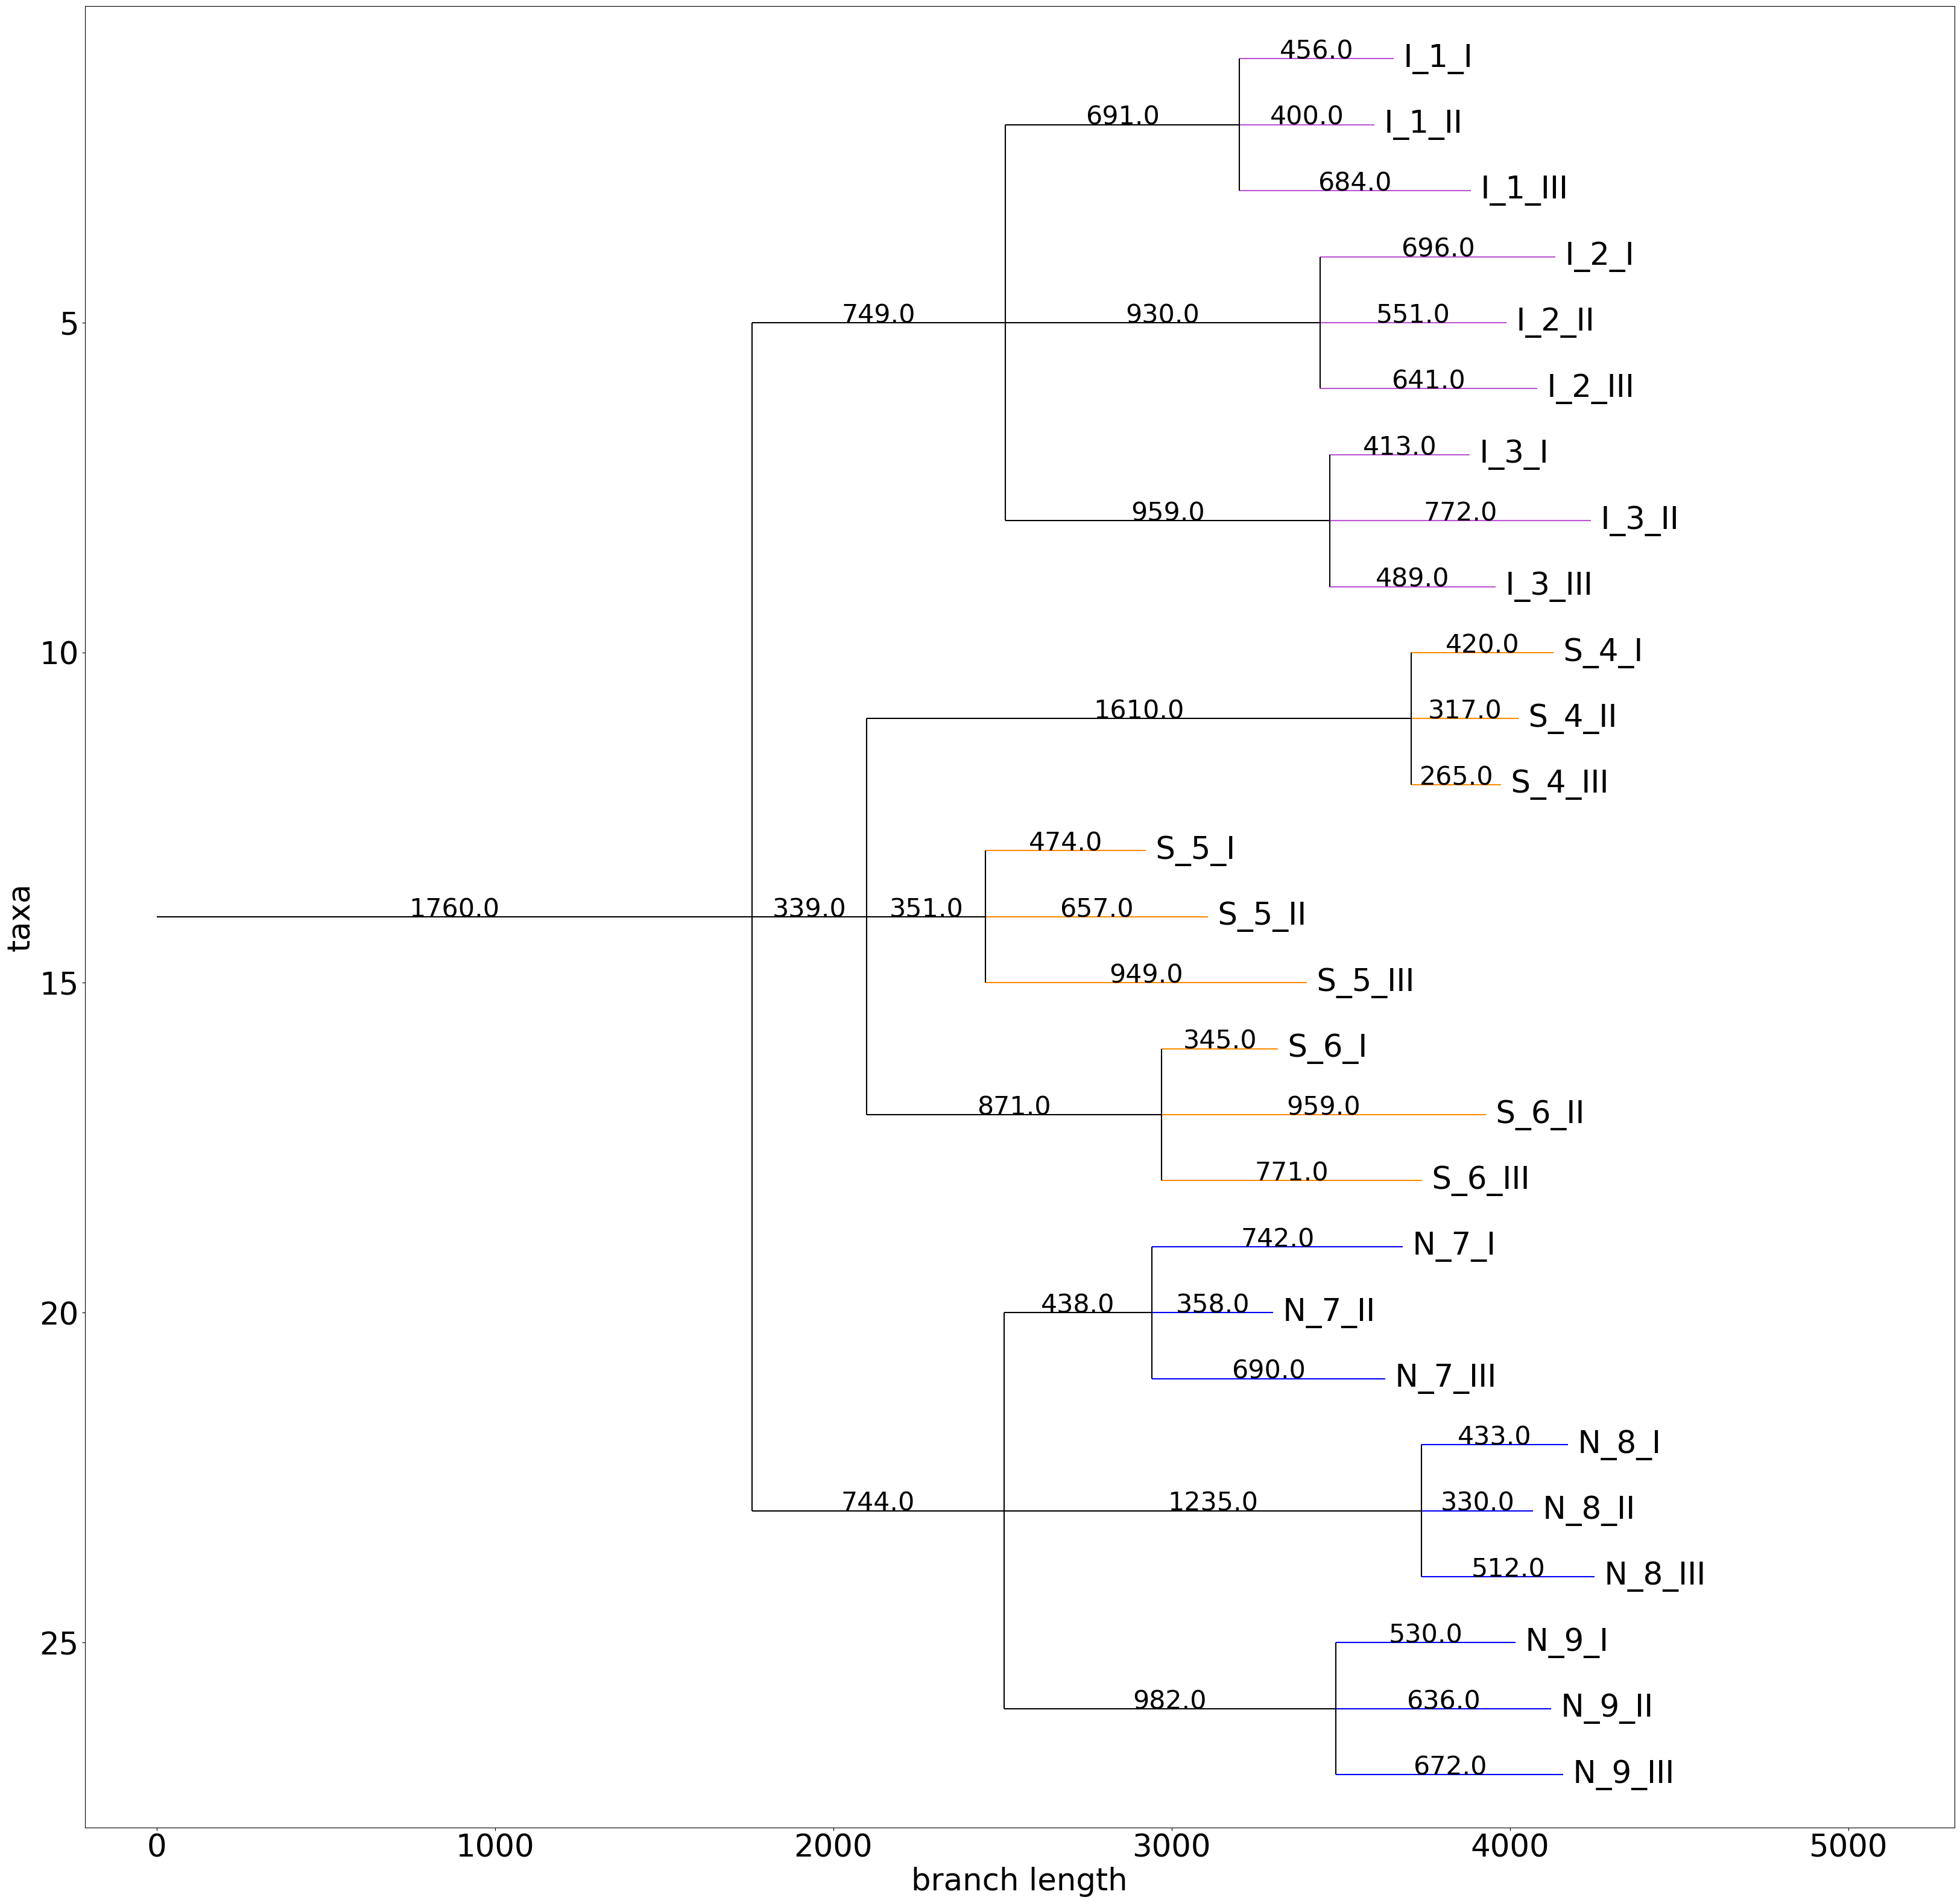

In [16]:
handle = StringIO(final_tree)            
tree = Phylo.read(handle, "newick", )
Phylo.write(tree, 'BCC-SUBTYPES-TREE' + '.dnd', "newick", format_branch_length='%i')

tree_data = Phylo.read('BCC-SUBTYPES-TREE.dnd',"newick")
draw_cancers_coloring_tree(tree_data)



# Create LocaI Intersection BCC Complement Tree.

In [17]:
final_tree, final_vector, table = build_LI_BCC_tree(df_bcc3,kind= 'complement')
df = pd.DataFrame(table, index = ['A','B','C','D','E','F','G','H','I','J','K','L','M'])
display(df)


Index(['I_1_I', 'I_1_II', 'I_1_III', 'I_2_I', 'I_2_II', 'I_2_III', 'I_3_I',
       'I_3_II', 'I_3_III'],
      dtype='object') 



Index(['S_4_I', 'S_4_II', 'S_4_III', 'S_5_I', 'S_5_II', 'S_5_III', 'S_6_I',
       'S_6_II', 'S_6_III'],
      dtype='object') 



Index(['N_7_I', 'N_7_II', 'N_7_III', 'N_8_I', 'N_8_II', 'N_8_III', 'N_9_I',
       'N_9_II', 'N_9_III'],
      dtype='object') 





,SCC LFQ intensity 21_1L,SCC LFQ intensity 21_3L,SCC LFQ intensity 21_5L,SCC LFQ intensity 31_1L,SCC LFQ intensity 31_3L,SCC LFQ intensity 31_5L,SCC LFQ intensity 32_1L,SCC LFQ intensity 32_3L,SCC LFQ intensity 32_5L,SCC LFQ intensity 90_1L,...,SCC LFQ intensity 45_3L,SCC LFQ intensity 60_3L,SCC LFQ intensity 95_3L,SCC LFQ intensity 101_3L,SCC&BCC LFQ intensity 25_1L,SCC&BCC LFQ intensity 25_3L,SCC&BCC LFQ intensity 25_5L,keratosis LFQ intensity 33_1L,keratosis LFQ intensity 33_3L,keratosis LFQ intensity 33_5L
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,L I UG,L II UG,L III UG,L I and L II CG,L I and L III CG,L II and L III CG
A,85,95,244,118,253,187
B,150,252,102,153,393,146
C,89,265,122,232,92,275
D,104,62,44,175,141,80
E,113,222,413,130,231,305
F,116,331,148,117,112,511
G,180,60,258,214,348,84
H,151,89,127,69,213,172
I,160,129,121,163,207,344
J,315,289,316,187,189,454


I_1_I
I_1_II
I_1_III
I_2_I
I_2_II
I_2_III
I_3_I
I_3_II
I_3_III
S_4_I
S_4_II
S_4_III
S_5_I
S_5_II
S_5_III
S_6_I
S_6_II
S_6_III
N_7_I
N_7_II
N_7_III
N_8_I
N_8_II
N_8_III
N_9_I
N_9_II
N_9_III


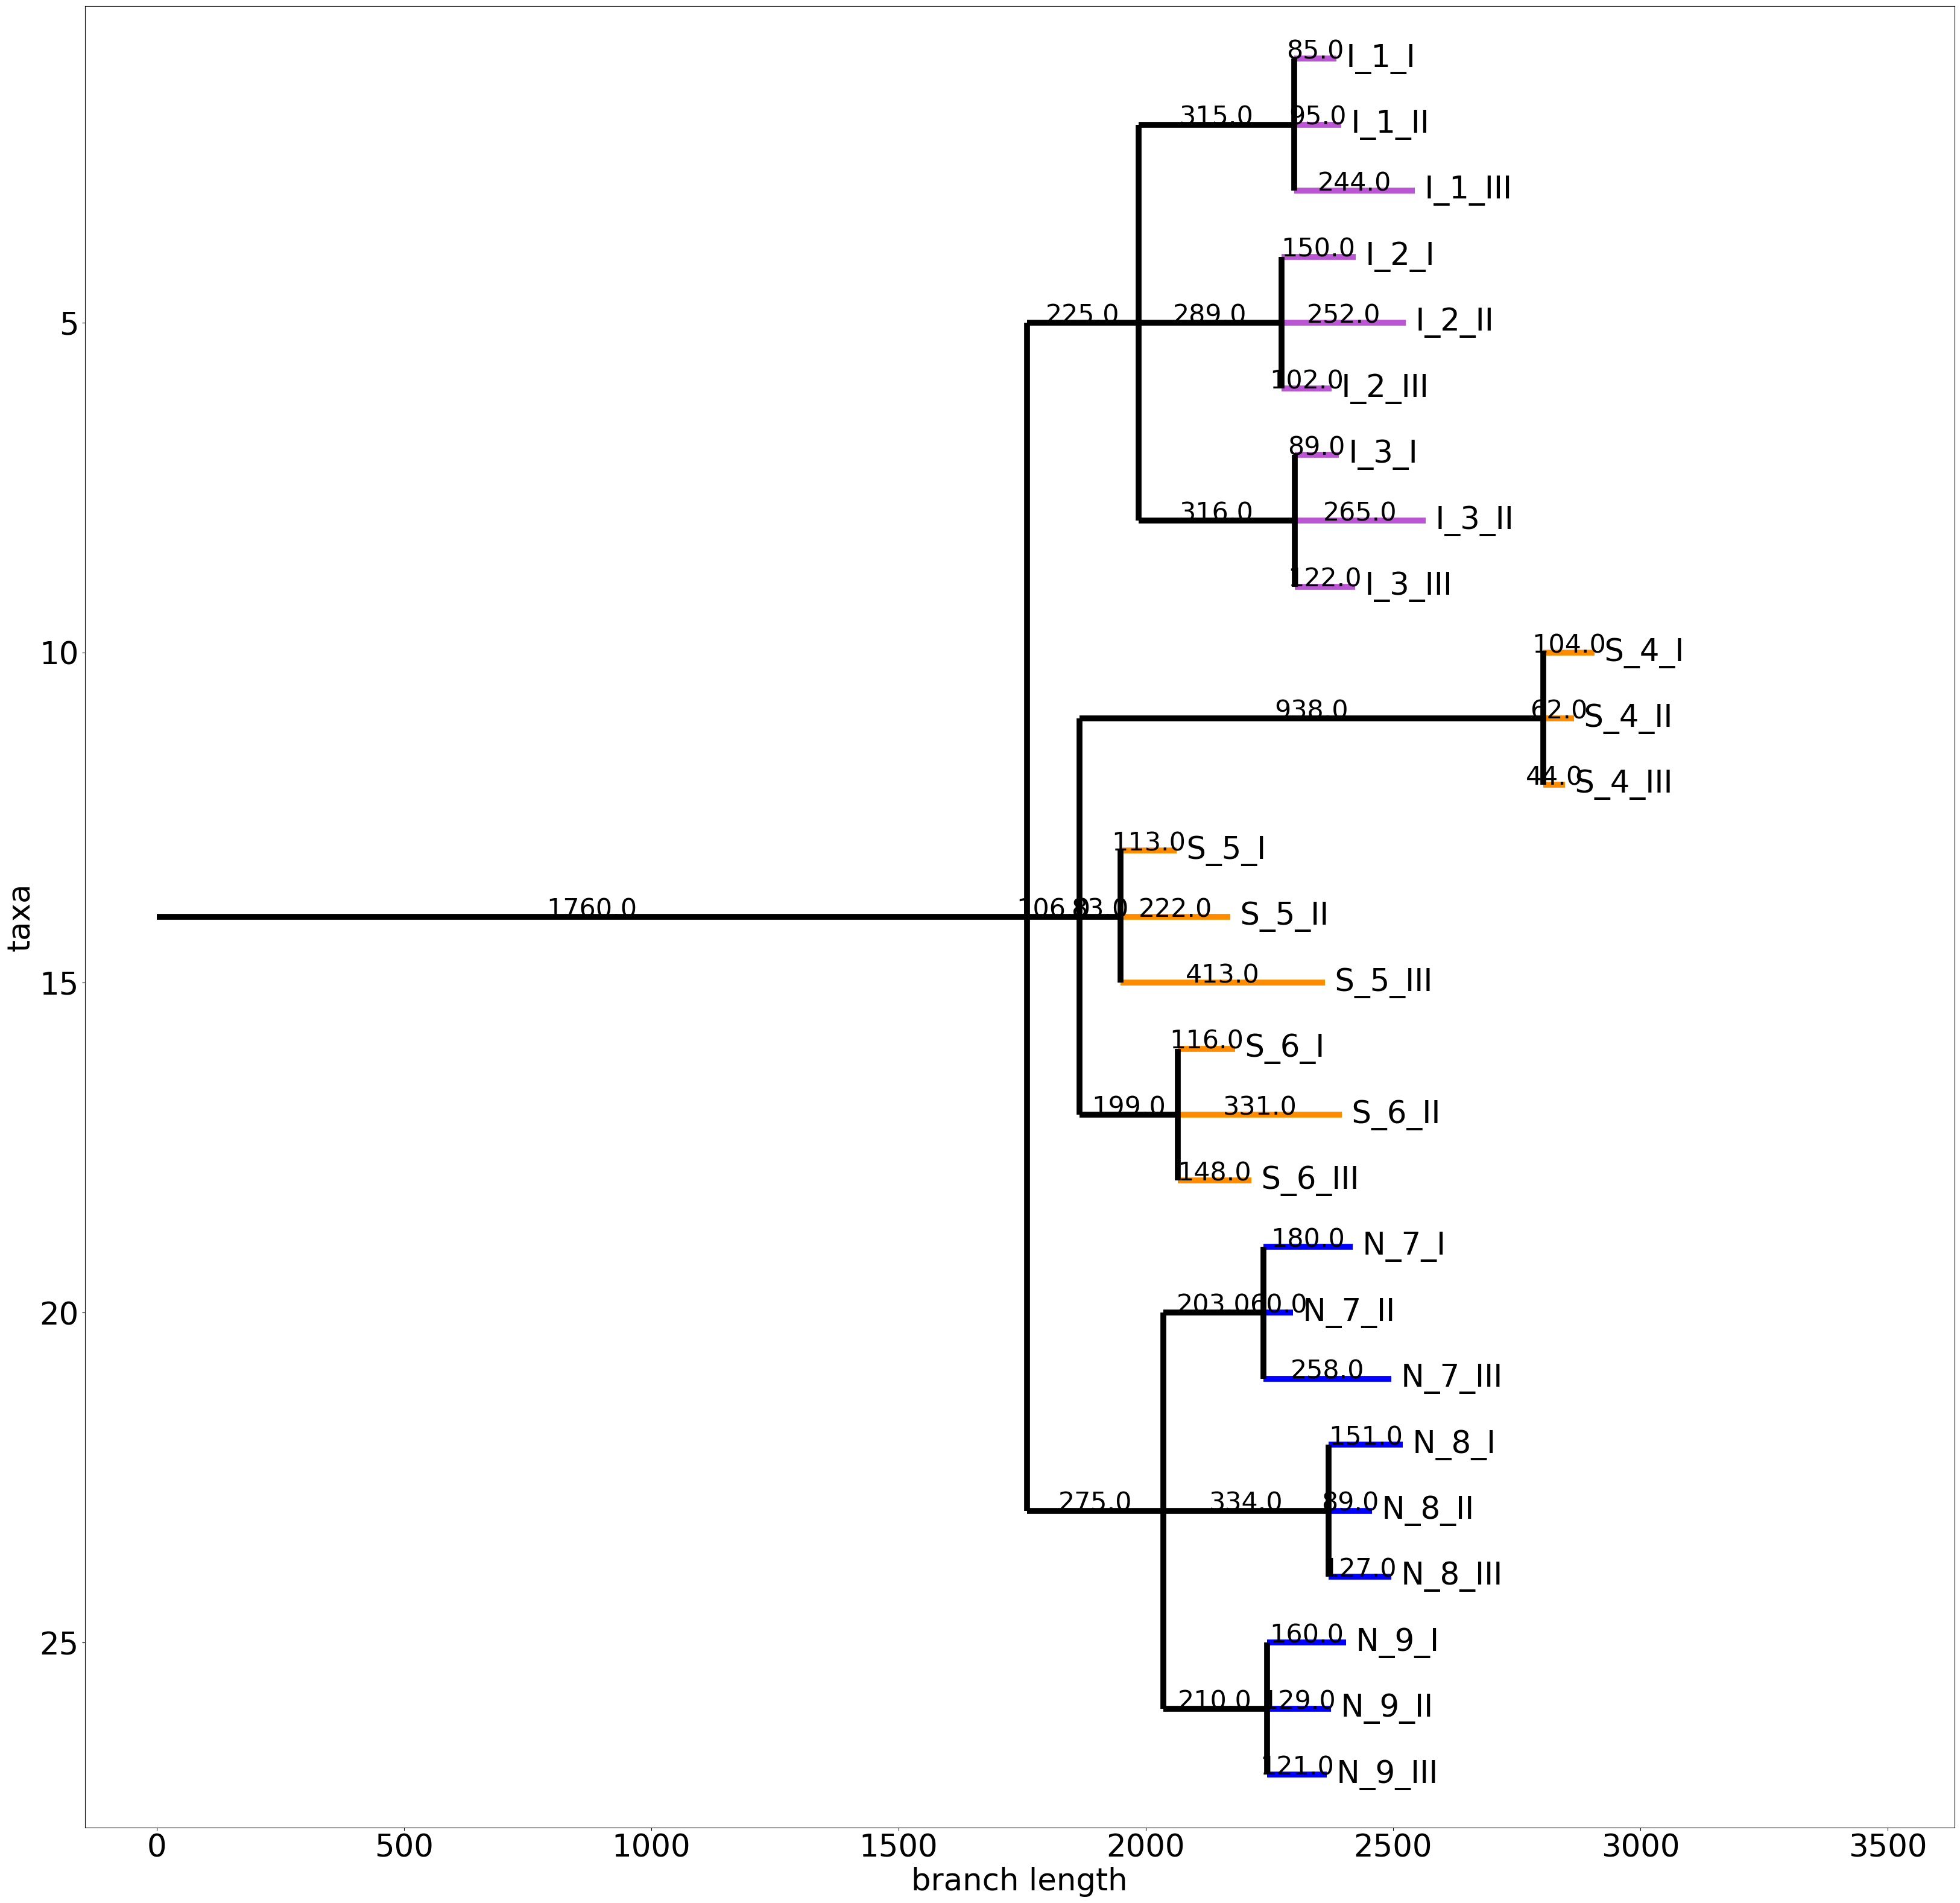

In [18]:
handle = StringIO(final_tree)            
tree = Phylo.read(handle, "newick")
Phylo.write(tree, 'BCC-SUBTYPES-TREE-COMPLEMENT' + '.dnd', "newick")

tree_data = Phylo.read('BCC-SUBTYPES-TREE-COMPLEMENT.dnd',"newick")
draw_cancers_coloring_tree(tree_data)

